## 실습 문제: He 가중치 초기화 시뮬레이션

**설명**: 딥러닝에서 신경망의 가중치는 학습 시작 전에 무작위로 초기화됩니다. He 초기화는 ReLU 활성화 함수에 적합한 방법으로, 가중치를 평균 0, 표준편차 $\sqrt{2 / \text{입력 뉴런 수}}$의 정규 분포로 설정합니다. `np.random.normal()`을 사용해 He 초기화를 시뮬레이션하고, 가중치 분포를 Matplotlib으로 히스토그램으로 시각화해보세요.

$$\text{weight} \sim \mathcal{N}(0, \sqrt{2/n_{in}})$$

**요구사항**:

  - 입력 뉴런 수(`fan_in`)를 1000으로 설정하고, He 초기화 원칙에 따라 1000개의 가중치를 생성하세요. 표준편차는 $\sqrt{2 / \text{입력 뉴런 수}}$ 로 계산합니다. (`np.random.normal` 함수를 사용하세요.)
  - 생성된 1000개의 가중치를 Matplotlib을 사용하여 히스토그램으로 시각화하고, 그래프의 제목을 "He Initialization Weights"로 설정하세요.
  - 생성된 히스토그램이 평균 0을 중심으로 대칭적인 종 모양을 갖는지 확인하고, 가중치 분포의 특성을 파악하세요.

(array([ 22.,  68., 134., 217., 245., 182.,  82.,  40.,   9.,   1.]),
 array([-0.1198066 , -0.0917947 , -0.0637828 , -0.0357709 , -0.00775899,
         0.02025291,  0.04826481,  0.07627671,  0.10428861,  0.13230052,
         0.16031242]),
 <BarContainer object of 10 artists>)

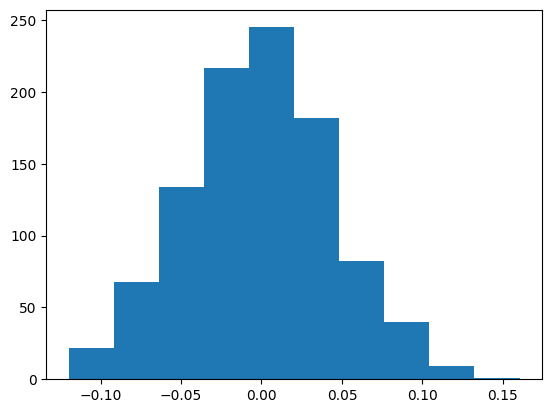

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rs = np.random.normal(0,np.sqrt(2/1000), 1000)

plt.hist(rs)

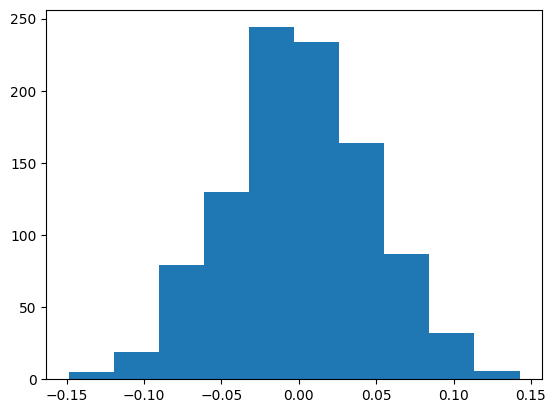

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def he_init(fan_in: int) -> None:
    """
    He 초기화에 따라 가중치를 생성하고 히스토그램으로 시각화합니다.
    
    
    Args:
        fan_in (int): 입력 뉴런의 수.
    """
    weights = np.random.normal(0,np.sqrt(2/fan_in), fan_in)

    grah = plt.hist(weights)


    


he_init(1000)


## 실습 문제: 소프트맥스 함수 계산 및 시각화

**설명**:
소프트맥스(Softmax) 함수는 인공지능 모델이 출력하는 점수(score 또는 logit)를 각 클래스에 대한 확률 분포로 변환하는 핵심적인 요소입니다. 예를 들어, 모델이 어떤 이미지에 대해 [강아지 점수=3, 고양이 점수=1]이라는 결과를 냈다면, 소프트맥스는 이를 [강아지일 확률=0.88, 고양이일 확률=0.12]와 같이 변환하여 모든 클래스의 확률 총합이 1이 되도록 만듭니다.

이 실습에서는 '고양이' 점수를 고정한 채 '강아지' 점수를 변화시키면서, 점수 변화에 따른 '강아지'일 확률의 변화를 계산하고 그래프로 시각화하여 소프트맥스 함수의 특징을 직관적으로 이해해 봅니다.

$$\text{softmax}(z)_{i} = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

**요구사항**:

1.  **입력 설정**: '강아지' 점수 `z_dog`를 `np.linspace(-5, 5, 100)`를 사용해 생성하고, '고양이' 점수 `z_cat`는 `1.0`으로 고정하세요.
2.  **함수 구현**: `softmax` 함수를 구현하여, 입력된 점수 배열 `z = [z_dog, z_cat]`에 대한 각 클래스의 확률을 계산하도록 만드세요. `np.exp()`를 사용하면 됩니다.
3.  **확률 계산**: `z_dog`의 각 점수에 대해 `softmax` 함수를 호출하여 '강아지일 확률'을 계산하고, 그 결과를 별도의 리스트에 저장하세요.
4.  **결과 시각화**: Matplotlib을 사용하여 x축은 '강아지 점수(`z_dog`)', y축은 '강아지일 확률'로 설정하여 2D 라인 그래프를 그리세요. 그래프의 제목과 축 레이블을 추가하여 결과를 명확하게 나타냅니다.


In [ ]:
logits = [3,1]

np.exp()

In [19]:
logits = np.array([3,1])

np.exp(logits)

array([20.08553692,  2.71828183])

In [25]:
np.sum(np.exp(logits))

np.float64(22.803818751646713)

In [21]:
np.exp(logits) / np.sum(np.exp(logits))

array([0.88079708, 0.11920292])

In [22]:
np.sum(np.exp(logits) / np.sum(np.exp(logits)))

np.float64(1.0)

(array([77.,  7.,  4.,  2.,  3.,  1.,  2.,  1.,  1.,  2.]),
 array([6.73794700e-03, 1.48473801e+01, 2.96880222e+01, 4.45286643e+01,
        5.93693064e+01, 7.42099485e+01, 8.90505906e+01, 1.03891233e+02,
        1.18731875e+02, 1.33572517e+02, 1.48413159e+02]),
 <BarContainer object of 10 artists>)

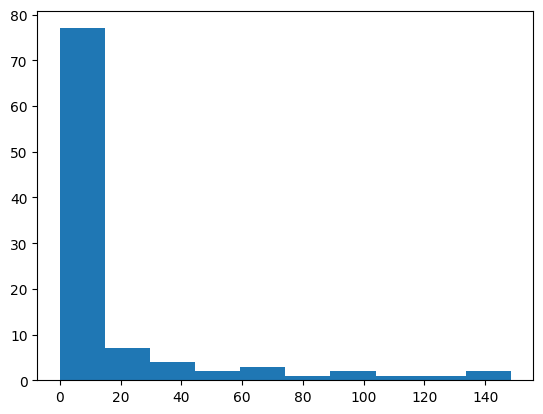

In [ ]:
z_dog = np.linspace(-5, 5, 100)
z_cat = 1.0


plt.hist(np.exp(z_dog))

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(logits: np.ndarray) -> np.ndarray:
    """
    입력된 로짓 배열에 대해 소프트맥스 확률을 계산합니다.
    
    Args:
        logits (np.ndarray): 모델의 원시 점수 배열.

    Returns:
        np.ndarray: 각 클래스에 대한 확률 배열.
    """
    e = np.exp*logits
    s = np.sum(e)
    return e / s

    pass





In [ ]:

z_dog_scores = np.linspace(-5, 5, 100)
z_cat_score = np.ones(100)
logits = np.array(list(zip(z_dog_scores,z_cat_score)))
logits.shape

dog_prob = []

## 실습 문제: ReLU 함수 구현 및 시각화

**설명**:
ReLU(Rectified Linear Unit) 함수, $f(x) = \max(0, x)$는 딥러닝에서 가장 널리 사용되는 활성화 함수 중 하나입니다. 입력값이 0보다 작으면 0을 반환하고, 0 이상이면 입력값을 그대로 반환하는 단순한 구조 덕분에 계산이 빠르고, 특정 조건에서 학습을 효율적으로 만듭니다. 이 실습에서는 NumPy와 Matplotlib을 사용하여 ReLU 함수의 동작을 직접 구현하고 그래프로 그려보겠습니다.

$$f(x) = \max(0, x)$$

**요구사항**:

  * `np.linspace()`를 사용하여 **x**의 범위를 -5부터 5까지 100개의 균일한 간격으로 생성하세요.
  * x의 각 원소에 ReLU 함수를 적용한 **y** 값을 계산하세요.
  * Matplotlib을 사용하여 **x**와 **y**를 기반으로 2D 라인 그래프를 그리세요.
  * 그래프의 제목은 "ReLU Function", x축 레이블은 "x", y축 레이블은 "f(x)"로 설정하고, 그리드를 추가하여 가독성을 높이세요.


(array([ 4.,  5.,  3., 15.,  9.,  5.,  6.,  1.,  1.,  1.]),
 array([-1.70113787, -1.26001993, -0.81890199, -0.37778405,  0.0633339 ,
         0.50445184,  0.94556978,  1.38668772,  1.82780566,  2.2689236 ,
         2.71004155]),
 <BarContainer object of 10 artists>)

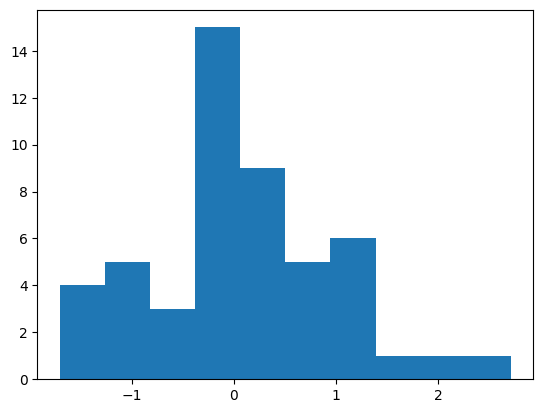

In [15]:
data = np.random.normal(0,1,50)

plt.hist(data)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x: np.ndarray) -> np.ndarray:
    """
    입력된 배열의 각 원소에 ReLU 함수를 적용합니다.

    Args:
        x (np.ndarray): 숫자들로 이루어진 NumPy 배열.

    Returns:
        np.ndarray: ReLU 함수가 적용된 결과 배열.
    """
    return np.maximum(0, x)
    


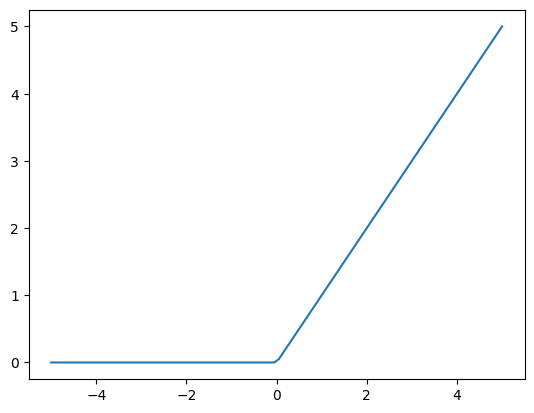

In [18]:

x_values = np.linspace(-5, 5, 100)
y_values = relu(x_values)

plt.plot(x_values, y_values)


## 실습 문제: 시그모이드 함수 구현 및 시각화

**설명**:
시그모이드(Sigmoid) 함수는 로지스틱 함수라고도 불리며, 임의의 실수 입력값을 **0과 1 사이의 값으로 변환**하는 데 사용됩니다. 과거에는 인공 신경망의 활성화 함수나 로지스틱 회귀와 같은 모델에서 출력을 확률처럼 해석하기 위해 널리 사용되었습니다. 함수의 출력이 부드러운 **'S'자 형태**를 띠는 것이 특징입니다. 이 실습을 통해 시그모이드 함수를 직접 구현하고 그래프로 그려보겠습니다.

$$S(x) = \frac{1}{1 + e^{-x}}$$

**요구사항**:

  * `np.linspace()`를 사용하여 **x**의 범위를 -10부터 10까지 100개의 균일한 간격으로 생성하세요.
  * 위 수학 공식을 바탕으로, 입력 `x`에 대한 시그모이드 함수 값을 계산하는 `sigmoid_function`을 구현하세요. `np.exp()` 함수를 사용합니다.
  * Matplotlib을 사용하여 x값에 따른 시그모이드 함수 값을 라인 그래프로 그리세요. 그래프의 제목은 "Sigmoid Function", x축 레이블은 "x", y축 레이블은 "S(x)"로 설정합니다.
  * 그래프의 **y=0.5** 지점에 수평선(`axhline`)을 점선으로 추가하여, 입력이 0일 때 출력이 0.5가 되는 시그모이드 함수의 중심점을 시각적으로 확인하세요.

## MSE 함수

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    입력된 배열의 각 원소에 시그모이드 함수를 적용합니다.

    Args:
        x (np.ndarray): 숫자들로 이루어진 NumPy 배열.

    Returns:
        np.ndarray: 시그모이드 함수가 적용된 결과 배열.
    """
    return 1 / (1 + np.exp(-x))


    


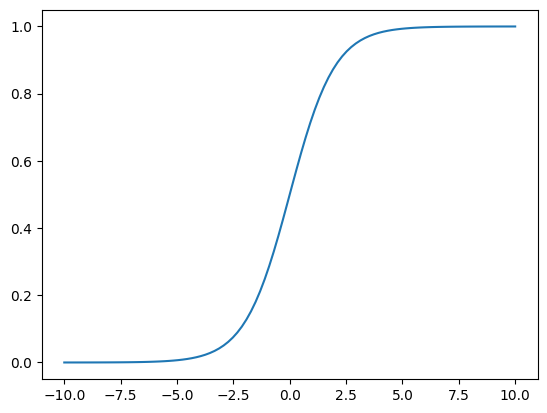

In [14]:
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.plot(x_values,y_values)